In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.container import BarContainer
from typing import Optional, Any

plt.style.use('ggplot')

In [8]:
path = "./games.csv"
games = pd.read_csv(path)
games.head()

,PlayerUid,NumberGames,GameLengthTurns,Winner,VPs,Rolls_2,Rolls_3,Rolls_4,Rolls_5,Rolls_6,...,ProductionBlocked_Wheat,ProductionBlocked_Sheep,ProductionBlocked_Ore,LongestRoad,LargestArmy,FirstDevCard,TurnsBlockedByRobber,RobberMoves,TurnsWithLargestArmy,TurnsWithLongestRoad
0,KGjZ6rJAhQOJAomDQtiL3O7mnT02,1,66,0,9,0,1,6,3,1,...,0,0,0,False,False,18,13,7,0,5
1,I4sSrMqzKQQctanTwvd5yvRyDPf2,1,66,1,16,3,2,0,4,8,...,0,0,0,True,True,11,17,8,4,5
2,KGjZ6rJAhQOJAomDQtiL3O7mnT02,1,53,1,15,0,4,3,1,2,...,0,0,0,True,True,8,2,8,6,12
3,wr1fwuZ1cNQFs8v1eKymO6dB96F3,1,53,0,4,1,0,2,5,5,...,2,0,1,False,False,54,0,3,0,0
4,EUTQ9k2E21VSnFDE4xzWMCIxEZJ2,1,83,1,15,1,3,4,4,6,...,6,0,10,False,True,20,28,10,6,0


In [58]:
""" 
Simple plots

Chance of winning given:
    largest road
    largest army
    first placement
    total production
    resources specific production
    first to build
    first settle, first city
    starting road (+ first placement or no)
    
Taking difference between self and opp. stats
    total production
    resource specific
    first build difference
"""

""" 
Goal: function, where we pass in df with 'Winner' and any number of Data cols
For each Data col, find the unique values, treat as categorical
    plot the % winrate for each unique value in a bar chart
    sort values numerically/alphabetically

    annotate the top of bar chart with sample size
    optionally, pass in labels in the form of a map

Use cases:
    % win given largest army
    % win given road
    % win given combinations (I have largest army, opp. has road. I have road, opp. has largest. etc.)
"""

def plotWinPercentageBar(df: pd.DataFrame):
    if len(df.columns) != 2: raise ValueError("Df must have 2 cols: Winner and Data")
    if 'Winner' not in df.columns: raise ValueError("Df must have Winner column")

    dataCol = df.columns[0] if df.columns[1] == 'Winner' else df.columns[1]

    grouped = df.groupby(dataCol).agg(['mean', 'count'])
    grouped = grouped.sort_values(by=('Winner', 'mean'), ascending=False)
    grouped.index = grouped.index.astype(str)

    fig, ax = plt.subplots(figsize=(8, 4))
    bars = ax.bar(grouped.index, grouped['Winner']['mean'])
    ax.set_xlabel(dataCol)
    ax.set_ylabel('P-Win')
    ax.set_title(f'Chances of Winning by {dataCol}')
    ax.tick_params(axis='x', labelsize=8)

    for i, bar in enumerate(bars):
        count = int(grouped.iloc[i, :]['Winner']['count'])
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_y(), f'#: {count}',
                ha='center', va='bottom',
                bbox=dict(facecolor='white', alpha=0.6))
        
def plotWinPercentageLine(df: pd.DataFrame):
    if len(df.columns) != 2: raise ValueError("Df must have 2 cols: Winner and Data")
    if 'Winner' not in df.columns: raise ValueError("Df must have Winner column")

    dataCol = df.columns[0] if df.columns[1] == 'Winner' else df.columns[1]

    grouped = df.groupby(dataCol).agg(['mean', 'count'])
    grouped.index = grouped.index.astype(str)

    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(grouped.index, grouped['Winner']['mean'])
    ax.set_xlabel(dataCol)
    ax.set_ylabel('P-Win')
    ax.set_title(f'Chances of Winning by {dataCol}')
    ax.tick_params(axis='x', labelsize=10)

    xlabels = grouped.index[::len(grouped.index)//5]
    ax.set_xticks(xlabels, xlabels)

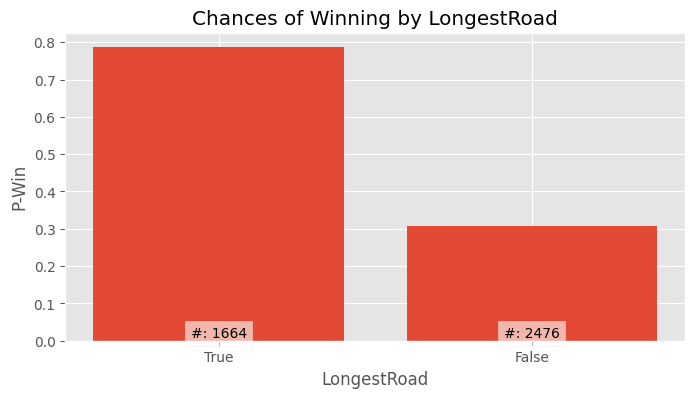

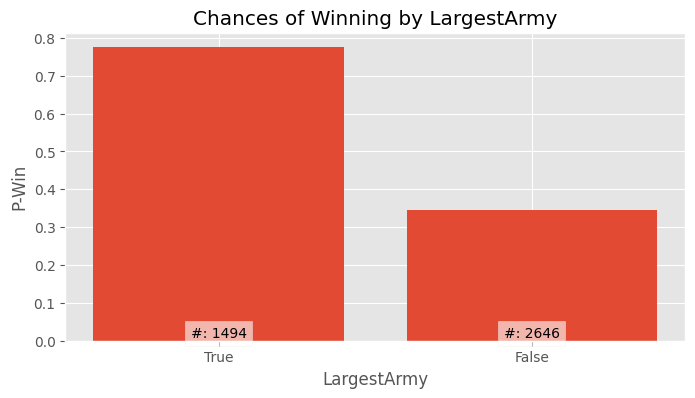

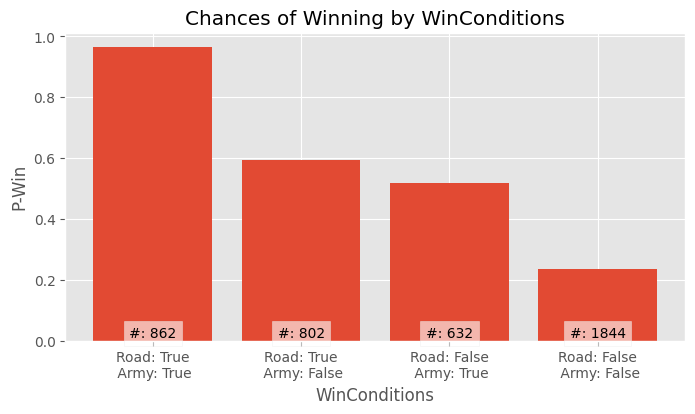

In [47]:
plotWinPercentageBar(games[['Winner', 'LongestRoad']])
plotWinPercentageBar(games[['Winner', 'LargestArmy']])

gamesCopy = games
gamesCopy['WinConditions'] = 'Road: ' + games['LongestRoad'].astype(str) + '\n Army: ' + games['LargestArmy'].astype(str)
plotWinPercentageBar(gamesCopy[['Winner', 'WinConditions']])

In [48]:
""" 
Add columns to df for opponent
"""
combinedGames = games
combinedGames = combinedGames.pivot(index='GameId', columns='PlacementOrder')
combinedGames.columns = [f'{col[0]}_{col[1]}' for col in combinedGames.columns]
combinedGames.head()

,PlayerUid_0,PlayerUid_1,NumberGames_0,NumberGames_1,GameLengthTurns_0,GameLengthTurns_1,Winner_0,Winner_1,VPs_0,VPs_1,...,TurnsBlockedByRobber_0,TurnsBlockedByRobber_1,RobberMoves_0,RobberMoves_1,TurnsWithLargestArmy_0,TurnsWithLargestArmy_1,TurnsWithLongestRoad_0,TurnsWithLongestRoad_1,WinConditions_0,WinConditions_1
GameId,,,,,,,,,,,,,,,,,,,,,
-NxKRCpnfHZqY0WHLBR9,KWdV8Y3wXEMCYsr8L4EoVErPNcu2,r7r06XgyoDV68KHVyrPdmHosNpo1,1,1,73,73,0,1,9,15,...,14,14,10,8,0,6,0,36,Road: False\n Army: False,Road: True\n Army: True
-NxKTq8u3AgJOHcu62A9,r7r06XgyoDV68KHVyrPdmHosNpo1,KWdV8Y3wXEMCYsr8L4EoVErPNcu2,1,1,77,77,0,1,12,15,...,10,24,7,11,0,8,19,0,Road: True\n Army: False,Road: False\n Army: True
-NxKazPwJ02tnr73x6Uu,OxmvZmMfxkUx7RYihN82IzgUS442,f1a1ywLQCeaqIIlimmegANeaMoq1,1,1,87,87,0,1,10,14,...,25,31,10,12,25,12,1,20,Road: False\n Army: False,Road: True\n Army: True
-NxKeH_2bdXT4QEdAt0j,OxmvZmMfxkUx7RYihN82IzgUS442,f1a1ywLQCeaqIIlimmegANeaMoq1,1,1,85,85,0,1,7,15,...,0,9,9,10,9,0,29,8,Road: False\n Army: False,Road: True\n Army: True
-NxKg_9PFR3a_82Rn8NI,j5MxrwR1iudca78F31bGMH5E4uC2,r7r06XgyoDV68KHVyrPdmHosNpo1,1,1,84,84,1,0,16,6,...,10,32,10,6,0,0,32,0,Road: True\n Army: True,Road: False\n Army: False


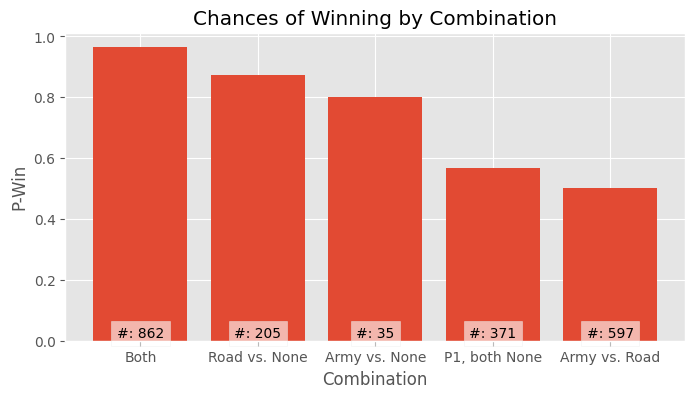

In [49]:
""" 
Who ends up with Wincons --> p(win)

Per game: 5 combinations
- 1 none, 1 army
- 1 none, 1 road
- 1 none, 1 both
- 1 none, 1 none
- 1 army, 1 road
"""

#  Returns Winner, CombinationType
def wincon_combinations(row):
    # I have Both
    for i in range(2):
        if row[f'LongestRoad_{i}'] == True and row[f'LargestArmy_{i}'] == True:
            return row[f'Winner_{i}'], 'Both'
        
    # I have army, opponent has road (will cover other way around too)
    for i in range(2):
        if row[f'LongestRoad_{1 - i}'] == True and row[f'LargestArmy_{i}'] == True:
            return row[f'Winner_{i}'], 'Army vs. Road'
    
    # I have army, opponent has none (doesnt' have road)
    for i in range(2):
        if row[f'LongestRoad_{1 - i}'] == False and row[f'LargestArmy_{i}'] == True:
            return row[f'Winner_{i}'], 'Army vs. None'

    # I have road, opponent has none (doesnt have army)
    for i in range(2):
        if row[f'LongestRoad_{i}'] == True and row[f'LargestArmy_{1 - i}'] == False:
            return row[f'Winner_{i}'], 'Road vs. None'
    
    # Both have neighter
    assert(row['LongestRoad_0'] == row['LongestRoad_1'] == row['LargestArmy_0'] == row['LargestArmy_0'] == 0)
    return row[f'Winner_0'], 'P1, both None'

winconDf = pd.DataFrame()
winconDf[['Winner', 'Combination']] = combinedGames.apply(wincon_combinations, axis=1, result_type='expand')

plotWinPercentageBar(winconDf)

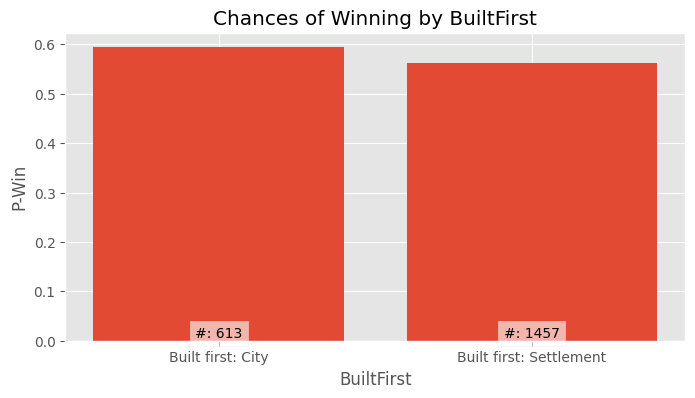

In [50]:
""" 
Who gets first settles / cities --> who wins
"""

def firstBuild(row):
    p0builds = (row['FirstSettlementBuiltPerPlayer_0'], row['FirstCityBuiltPerPlayer_0'])
    p1builds = (row['FirstSettlementBuiltPerPlayer_1'], row['FirstCityBuiltPerPlayer_1'])

    if min(p0builds) <= min(p1builds):
        buildType = 'Settlement' if p0builds[0] < p0builds[1] else 'City'
        return row['Winner_0'], f'Built first: {buildType}'
    else:
        buildType = 'Settlement' if p1builds[0] < p1builds[1] else 'City'
        return row['Winner_1'], f'Built first: {buildType}'

firstBuildDf = pd.DataFrame()
firstBuildDf[['Winner', 'BuiltFirst']] = combinedGames.apply(firstBuild, axis=1, result_type='expand')
plotWinPercentageBar(firstBuildDf)

/var/folders/_c/j62lsd3n7x9_vq272kdsl3fc0000gn/T/ipykernel_30818/827462145.py:41: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(dataCol).agg(['mean', 'count'])
/var/folders/_c/j62lsd3n7x9_vq272kdsl3fc0000gn/T/ipykernel_30818/827462145.py:41: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(dataCol).agg(['mean', 'count'])


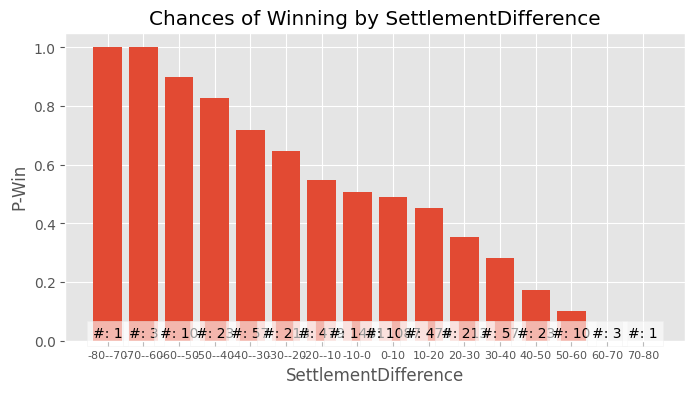

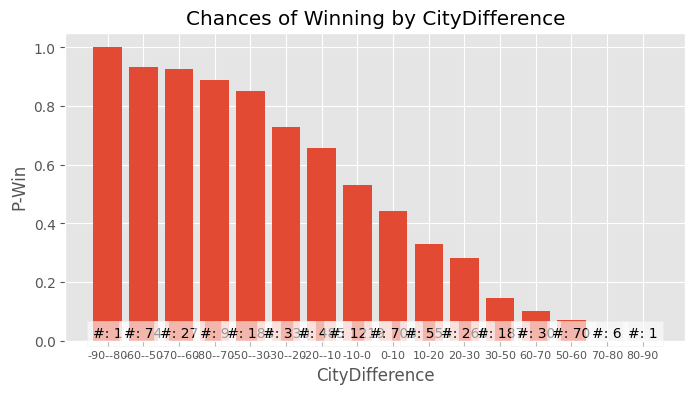

In [73]:
for buildType in ['Settlement', 'City']:
    firstDf = pd.DataFrame()
    secondDf = pd.DataFrame()

    firstDf['Winner'] = combinedGames['Winner_0']
    firstDf[f'{buildType}Difference'] = combinedGames[f'First{buildType}BuiltPerPlayer_0'] - combinedGames[f'First{buildType}BuiltPerPlayer_1']

    secondDf['Winner'] = combinedGames['Winner_1']
    secondDf[f'{buildType}Difference'] = combinedGames[f'First{buildType}BuiltPerPlayer_1'] - combinedGames[f'First{buildType}BuiltPerPlayer_0']

    firstToBuild = pd.concat([firstDf, secondDf], axis=0)
    bins = pd.cut(firstToBuild[f'{buildType}Difference'], bins=16, precision=-1)
    bins = bins.apply(lambda x: f'{int(x.left)}-{int(x.right)}')
    firstToBuild[f'{buildType}Difference'] = bins

    plotWinPercentageBar(firstToBuild)